<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Optimisation-de-l'environnement" data-toc-modified-id="Optimisation-de-l'environnement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimisation de l'environnement</a></span></li><li><span><a href="#Définitions-des-fonctions" data-toc-modified-id="Définitions-des-fonctions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Définitions des fonctions</a></span></li><li><span><a href="#Ouverture-du-Dataframe" data-toc-modified-id="Ouverture-du-Dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ouverture du Dataframe</a></span></li><li><span><a href="#1ère-itération-Modèle-de-Machine-Learning-:-régression-linéaire" data-toc-modified-id="1ère-itération-Modèle-de-Machine-Learning-:-régression-linéaire-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>1ère itération Modèle de Machine Learning : régression linéaire</a></span><ul class="toc-item"><li><span><a href="#SiteEnergyUse(kBtu)" data-toc-modified-id="SiteEnergyUse(kBtu)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>SiteEnergyUse(kBtu)</a></span></li><li><span><a href="#TotalGHGEmissions" data-toc-modified-id="TotalGHGEmissions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>TotalGHGEmissions</a></span></li></ul></li></ul></div>

# Introduction

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.  
Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

# Optimisation de l'environnement

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import missingno as msno

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# Définitions des fonctions

# Ouverture du Dataframe

In [20]:
# Ouverture du dataframe. Pd.set_option pour afficher toutes les colonnes

B_E_B = pd.read_csv("B_E_B_Cleané.csv",index_col = 0)
pd.set_option('display.max_columns', None)
B_E_B.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0.0,88434.0,Hotel,Hotel,88434.0,Unknown,0.0,Unknown,0.0,0,60.0,81.699997,182.500000,7226362.5,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,0,61.0,94.800003,176.100006,8387933.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718.0,759392.0,Hotel,Hotel,756493.0,Unknown,0.0,Unknown,0.0,0,43.0,96.000000,241.899994,72587024.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0.0,61320.0,Hotel,Hotel,61320.0,Unknown,0.0,Unknown,0.0,0,56.0,110.800003,216.199997,6794584.0,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,0,75.0,114.800003,211.399994,14172606.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [21]:
B_E_B.shape

(1644, 41)

<AxesSubplot:>

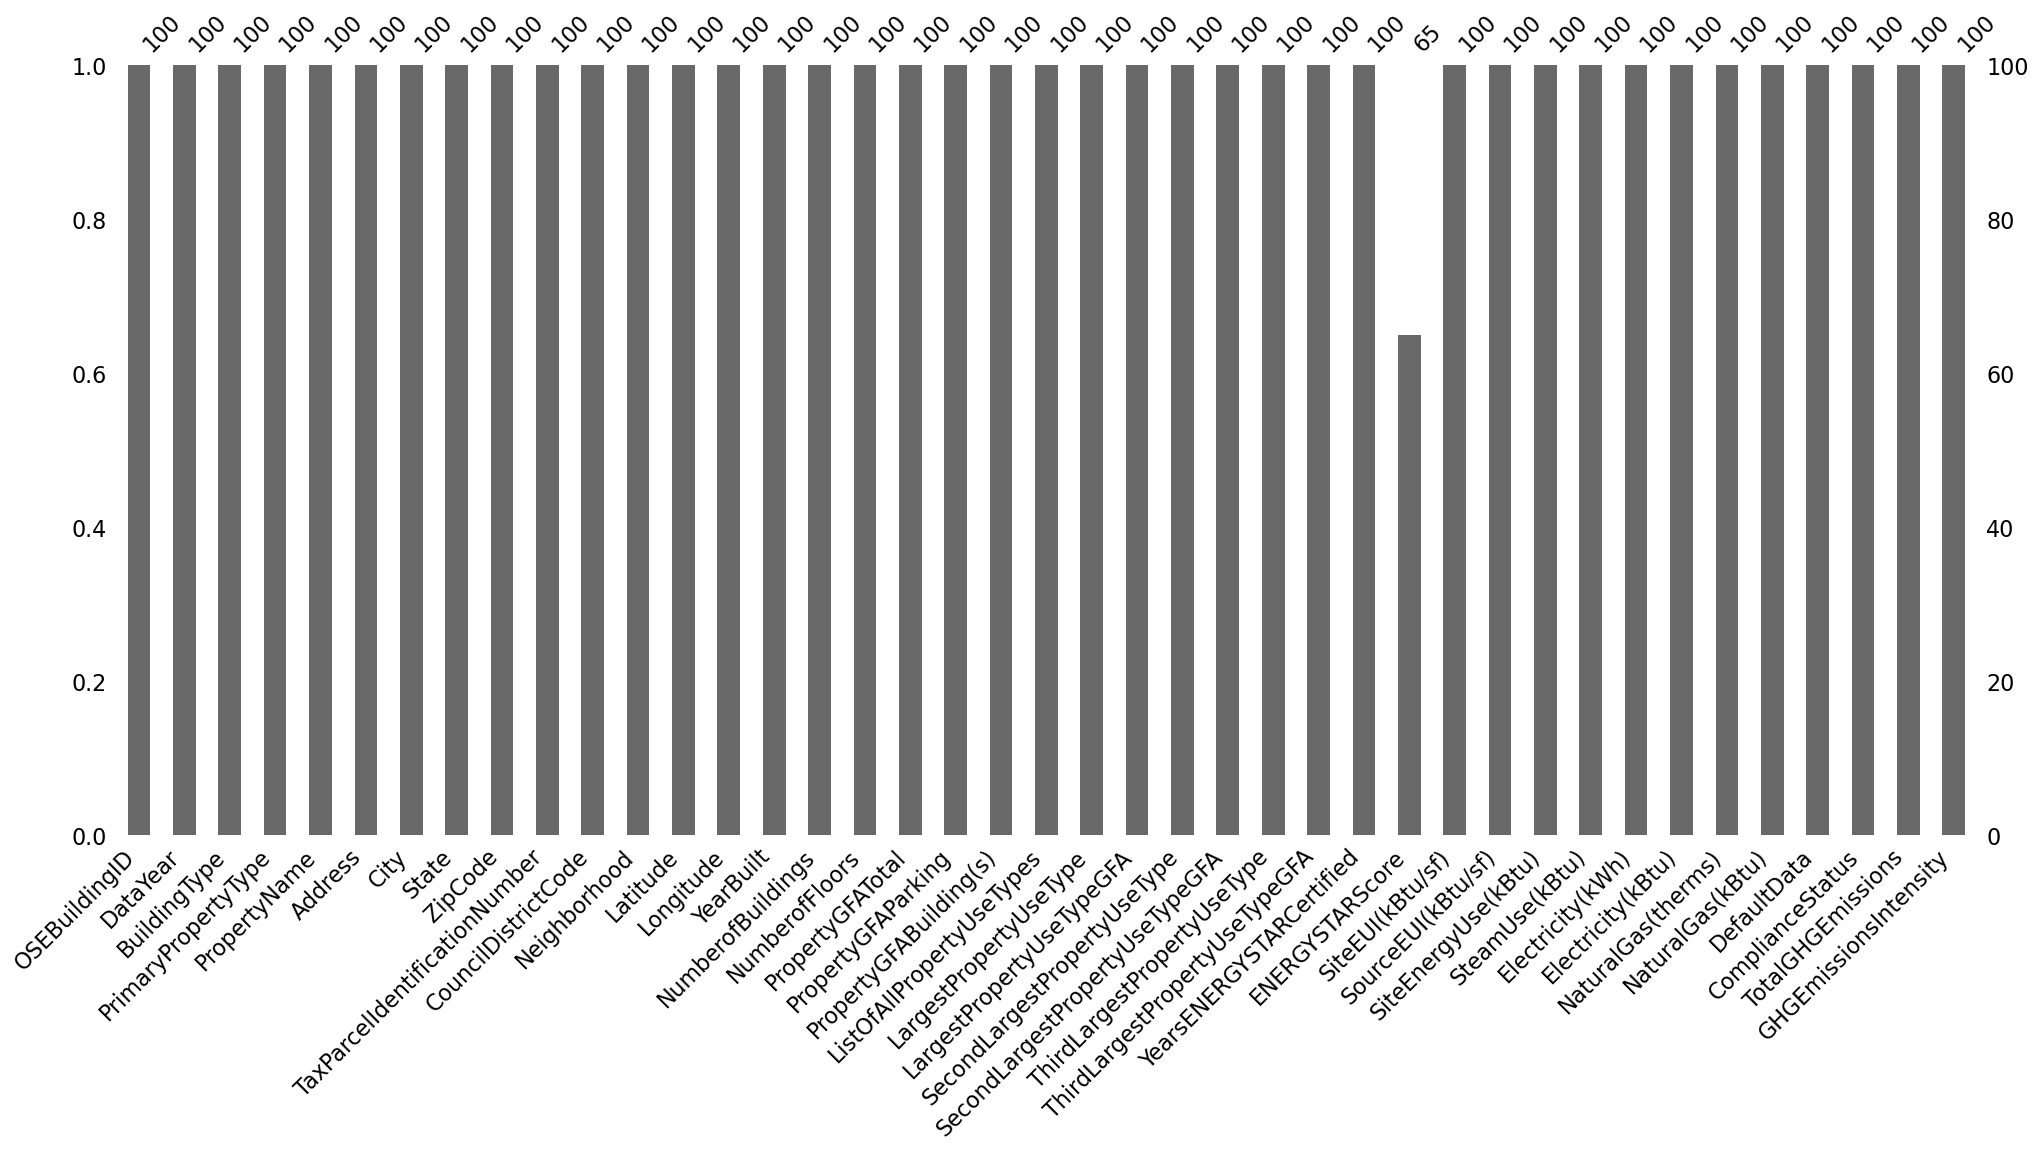

In [22]:
msno.bar(B_E_B.sample(100))

In [23]:
B_E_B.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

# 1ère itération Modèle de Machine Learning : régression linéaire
Les variables catégorielles sont à encoder dans le feature engineering  
Cross validation à faire, etc etc.

## SiteEnergyUse(kBtu)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
#Je crée une copie du df 
B_E_B_RL = B_E_B.copy()

In [25]:
#Création d'une V1
B_E_B_RL["SiteEnergyUse(kBtu)_V1"] = B_E_B_RL["SiteEnergyUse(kBtu)"]

In [26]:
# Suppression des  valeurs manquantes *Reset.index?*
B_E_B_RL.dropna(axis=0, inplace = True)
B_E_B_RL.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse(kBtu)_V1
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0.0,88434.0,Hotel,Hotel,88434.0,Unknown,0.0,Unknown,0.0,0,60.0,81.699997,182.500000,7226362.5,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83,7226362.5
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,0,61.0,94.800003,176.100006,8387933.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86,8387933.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718.0,759392.0,Hotel,Hotel,756493.0,Unknown,0.0,Unknown,0.0,0,43.0,96.000000,241.899994,72587024.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19,72587024.0
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0.0,61320.0,Hotel,Hotel,61320.0,Unknown,0.0,Unknown,0.0,0,56.0,110.800003,216.199997,6794584.0,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67,6794584.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,0,75.0,114.800003,211.399994,14172606.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88,14172606.0


In [28]:
y = B_E_B_RL["SiteEnergyUse(kBtu)_V1"]
print(y)

0        7226362.50
1        8387933.00
2       72587024.00
3        6794584.00
4       14172606.00
           ...     
3329    13239050.00
3337     6042399.50
3338     3605855.50
3339     4420650.50
3347     1325972.75
Name: SiteEnergyUse(kBtu)_V1, Length: 1088, dtype: float64


In [29]:
X = B_E_B_RL.loc[:,['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','YearBuilt','ZipCode','Latitude','Longitude']]
print(X)

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                 0.0   
1                   1.0              11            103566             15064.0   
2                   1.0              41            956110            196718.0   
3                   1.0              10             61320                 0.0   
4                   1.0              18            175580             62000.0   
...                 ...             ...               ...                 ...   
3329                1.0              13            536697            197659.0   
3337                1.0               4            126823             41539.0   
3338                1.0               1             52085              4222.0   
3339                1.0               2             24990                 0.0   
3347                1.0               3             45000                 0.0   

      PropertyGFABuilding(s

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(B_E_B_RL.shape)
print(X_train.shape)
print(X_test.shape)

(1088, 42)
(870, 12)
(218, 12)


In [36]:
# Score du R2 : le modèle représente 70% de la variation des données réelles. 

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.7062386232250066

In [43]:
# Les distributions sont respectées.
B_E_B_RL[["SiteEnergyUse(kBtu)","SiteEnergyUse(kBtu)_V1"]].describe()

,SiteEnergyUse(kBtu),SiteEnergyUse(kBtu)_V1
count,1.088000e+03,1.088000e+03
mean,8.401306e+06,8.401306e+06
std,2.479196e+07,2.479196e+07
min,0.000000e+00,0.000000e+00
25%,1.290258e+06,1.290258e+06
50%,2.665526e+06,2.665526e+06
75%,7.313082e+06,7.313082e+06
max,4.483853e+08,4.483853e+08


## TotalGHGEmissions 

In [46]:
#Création d'une V1
B_E_B_RL["TotalGHGEmissions_V1"] = B_E_B_RL["TotalGHGEmissions"]

In [47]:
y = B_E_B_RL["TotalGHGEmissions_V1"]
print(y)

0        249.98
1        295.86
2       2089.28
3        286.43
4        505.01
         ...   
3329     245.16
3337     131.02
3338     157.70
3339     134.80
3347       9.24
Name: TotalGHGEmissions_V1, Length: 1088, dtype: float64


In [48]:
# Score du R2 : le modèle représente 70% de la variation des données réelles. 

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.7165428116193653

In [49]:
# Les distributions sont respectées.
B_E_B_RL[["TotalGHGEmissions_V1","TotalGHGEmissions"]].describe()

,TotalGHGEmissions_V1,TotalGHGEmissions
count,1088.000000,1088.000000
mean,185.266278,185.266278
std,825.834733,825.834733
min,-0.800000,-0.800000
25%,20.420000,20.420000
50%,50.195000,50.195000
75%,136.010000,136.010000
max,16870.980000,16870.980000
